# Section 3.6 — Statistical design and error analysis

This notebook contains the code examples from [Section 3.6 Statistical design and error analysis]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/design"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
#######################################################

## Definitions

Saved figure to figures/stats/design/H0_rejection_region.pdf
Saved figure to figures/stats/design/H0_rejection_region.png


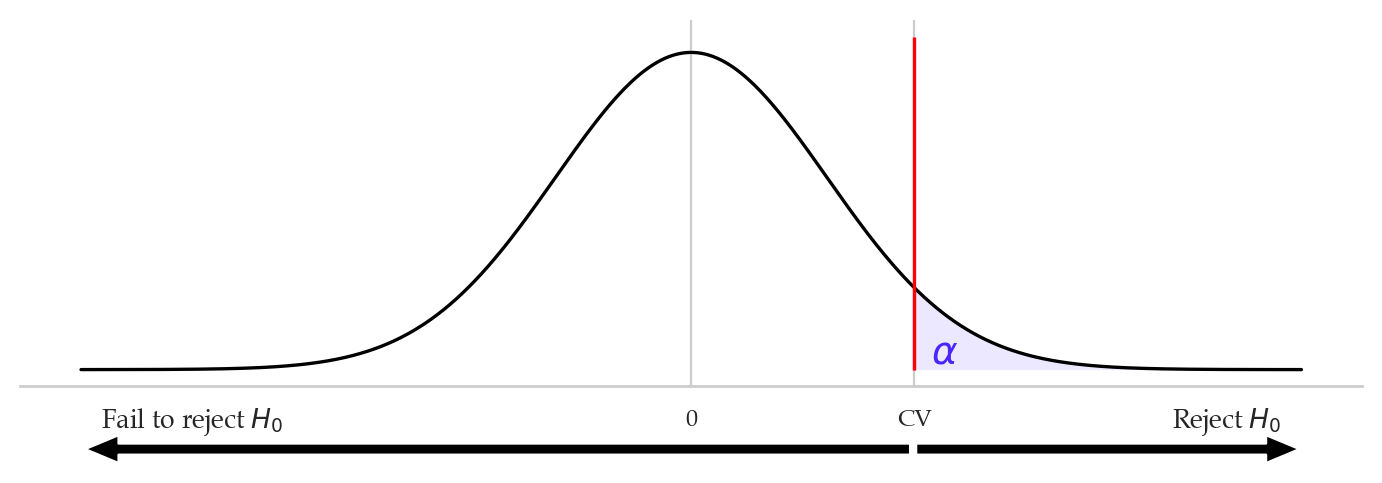

In [6]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "H0_rejection_region.pdf")
from plot_helpers import plot_alpha_beta_errors
with plt.rc_context({"figure.figsize":(7,2.5)}):
    ax = plot_alpha_beta_errors(cohend=0.1, ax=None, xlims=[-3,3], n=9, show_alt=False, show_concl=True, alpha_offset=0.07)
    savefigure(ax, filename)

Saved figure to figures/stats/design/H0_HA_distributions_cvalue.pdf
Saved figure to figures/stats/design/H0_HA_distributions_cvalue.png


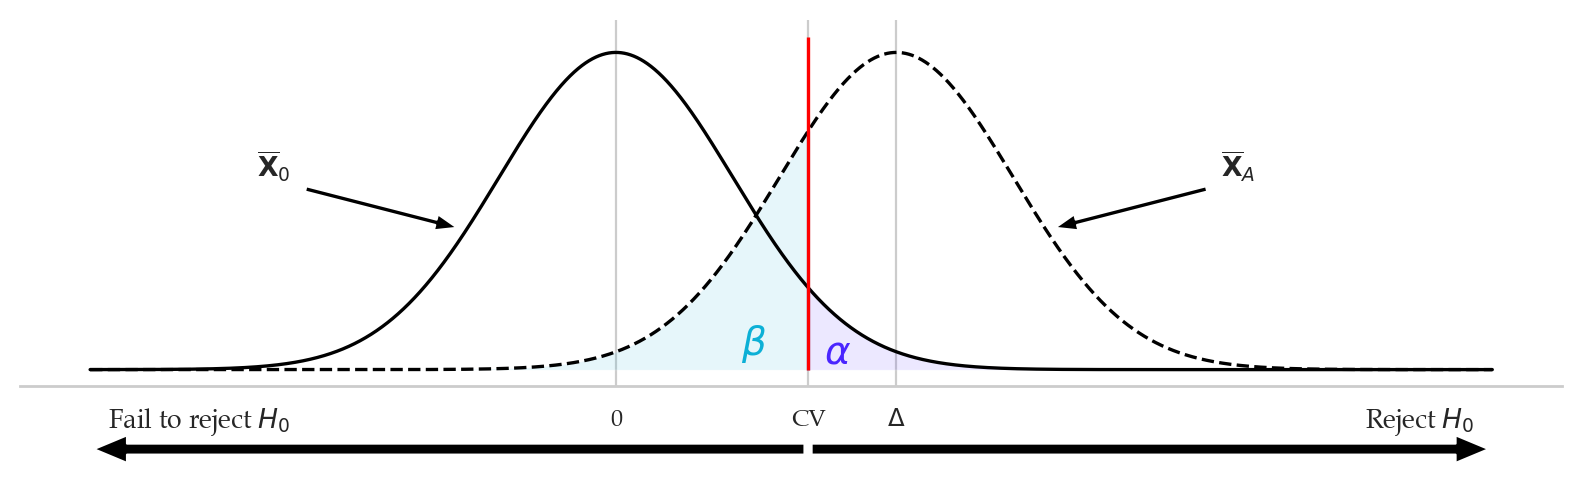

In [7]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "H0_HA_distributions_cvalue.pdf")
from plot_helpers import plot_alpha_beta_errors

with plt.rc_context({"figure.figsize":(8,2.5)}):
    ax = plot_alpha_beta_errors(cohend=0.8, show_dist_labels=True, show_concl=True, alpha_offset=0.07)

savefigure(ax, filename)

## Hypothesis testing as a decision rule

## Statistical design

Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.pdf
Saved figure to figures/stats/design/panel_beta_for_different_effect_sizes.png


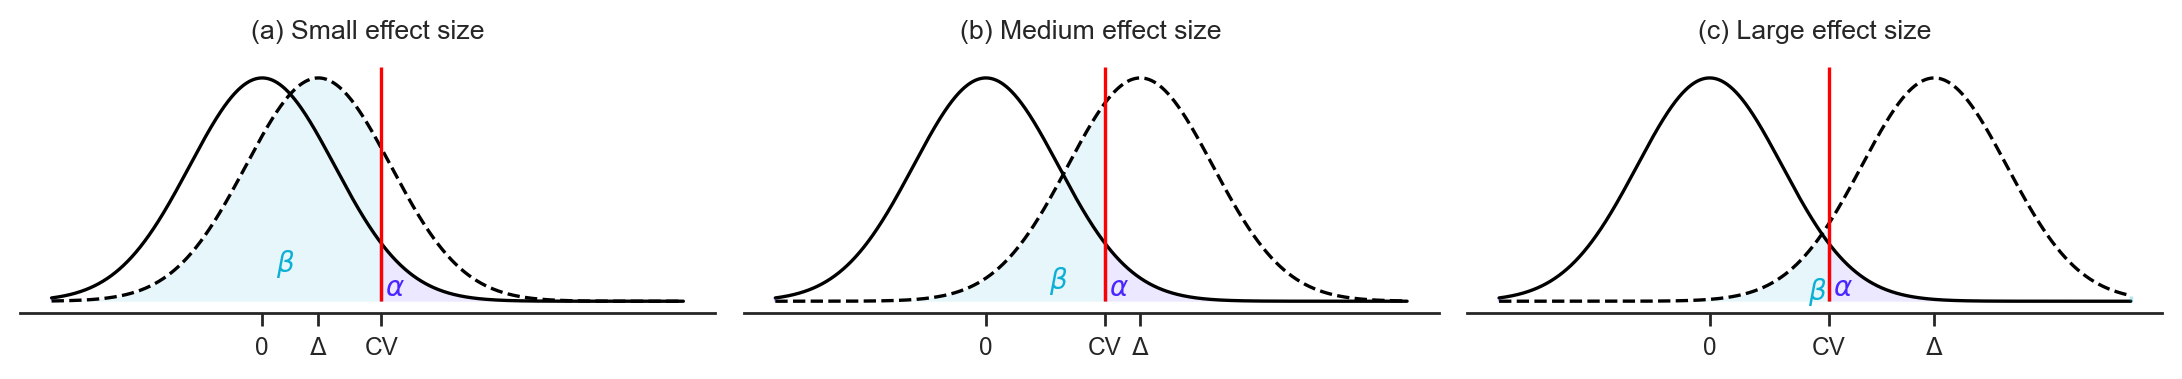

In [8]:
# FIGURES ONLY
filename = os.path.join(DESTDIR, "panel_beta_for_different_effect_sizes.pdf")
d_small = 0.20
d_medium = 0.55 # chosen to avoid overlap between CV and Delta
d_large = 0.80


with sns.axes_style("ticks"):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(11,2))
    
    plot_alpha_beta_errors(cohend=d_small,  xlims=[-1.5,3], n=15, ax=ax1, fontsize=10)
    ax1.set_title("(a) Small effect size")
    
    plot_alpha_beta_errors(cohend=d_medium, xlims=[-1.5,3], n=15, ax=ax2, fontsize=10)
    ax2.set_title("(b) Medium effect size")
    
    plot_alpha_beta_errors(cohend=d_large,  xlims=[-1.5,3], n=15, ax=ax3, fontsize=10)
    ax3.set_title("(c) Large effect size")

savefigure(fig, filename)

## Example 1: detect kombuncha volume deviation from theory

In [ ]:
from statsmodels.stats.power import TTestPower
ttp = TTestPower()

Need to obtain Cohen's $d$

In [55]:
min_delta = 4
std_pop = 10
d = min_delta / std_pop

In [56]:
n = ttp.solve_power(effect_size=d, nobs=None, alpha=0.05, power=0.8, alternative='two-sided')
n

51.009448579637365

In [54]:
n = int(n)
n

51

In [11]:
#######################################################
kombuchapop = pd.read_csv("../datasets/kombuchapop.csv")
batch55pop = kombuchapop[kombuchapop["batch"]==55]
kpop55 = batch55pop["volume"]

In [12]:
np.random.seed(42)
ksample55 = kpop55.sample(n)
ksample55.values

array([ 986.93,  997.65,  999.11,  994.12, 1004.86, 1012.  ,  988.35,
       1000.79, 1012.09,  988.39,  985.64,  994.23,  990.63, 1011.05,
       1008.73, 1007.68,  987.89, 1002.74,  996.04,  986.46, 1005.77,
       1024.76,  986.84,  986.43,  998.54, 1006.27,  995.14,  999.45,
       1006.04, 1006.13, 1011.93, 1000.7 , 1012.77,  994.04,  996.23,
        987.79,  977.65, 1006.07,  995.5 , 1012.98,  980.8 ,  976.5 ,
        988.78,  989.33, 1012.49, 1004.41,  997.59, 1005.93, 1008.5 ,
       1008.73,  988.63])

In [65]:
from stats_helpers import ttest_mean

ttest_mean(ksample55, mu0=1000)

0.34858705472775714

In [66]:
# ALT.
# from stats_helpers import simulation_test_mean
# simulation_test_mean(ksample55, mu0=1000, sigma0=10)

## Example 2: comparison of East vs. West electricity prices 

In [50]:
#######################################################
eprices = pd.read_csv("../datasets/eprices.csv")
eprices.groupby("end").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
end                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

In [ ]:
from statsmodels.stats.power import TTestIndPower
ttindp = TTestIndPower()

Need to calculate Cohen's $d$ that corresponds to the assumption $\Delta_{\text{min}} = 1$
and assuming the standard deviation of the population is $\sigma=1$.

In [48]:
Delta_min = 1
std_guess = 1

d_min = Delta_min / std_guess 

In [ ]:
# power of two-sample t-test assuming d_min and n=m=9 
ttindp.power(effect_size=d_min, nobs1=9, 
             alpha=0.05, alternative='two-sided')

The function `solve_power` takes as arguments three of the four possible design parameters,
`alpha`, `power`, `nobs1`, `effect_size` and calculates the fourth one.

#### Calculate minimum effect size

In [ ]:
# minimum effect size to achieve 80% when n=m=9
ttindp.solve_power(alpha=0.05, power=0.8, nobs1=9)

#### Calculate sample size needed to achieve 0.8 power

In [47]:
# minimum sample size required to achieve d_min at 80% power
ttindp.solve_power(effect_size=d_min, alpha=0.05, power=0.8)
#######################################################

16.71472257227619

## Alternative calculation methods

### Using `pingouin`

In [ ]:
import pingouin as pg

In [45]:
# power of two-sample t-test assuming d_min and n=m=9 
pg.power_ttest(d=d_min, alpha=0.05, n=9)

0.5133625331068467

In [44]:
# minimum effect size to achieve 80% when n=m=9
pg.power_ttest(alpha=0.05, power=0.8, n=9)

1.4069271327730888

In [43]:
# minimum sample size required to achieve d_min at 80% power
pg.power_ttest(d=d_min, alpha=0.05, power=0.8, n=None)

16.714722447035737

## Explanations

### Unique value proposition of hypothesis testing

### One-sided and two-sided rejection regions

Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.png


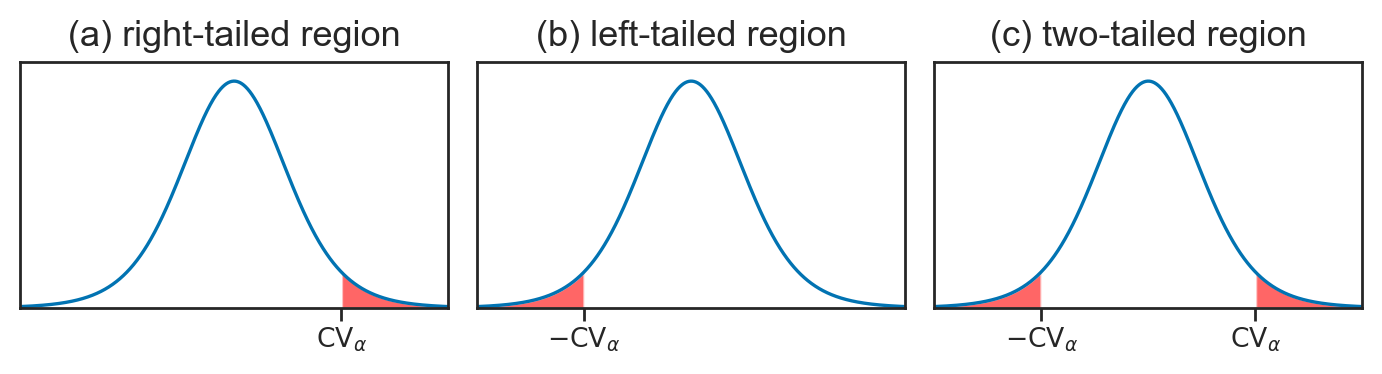

In [20]:
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
    
from scipy.stats import t as tdist
rvT = tdist(df=9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

with plt.rc_context({"figure.figsize":(7,2)}), sns.axes_style("ticks"):
    fig, (ax3, ax1, ax2) = plt.subplots(1,3)

    # RIGHT
    title = '(a) right-tailed region'
    ax3.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax3)
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(0, 0.42)
    ax3.set_xticks([2])
    ax3.set_xticklabels([])
    ax3.set_yticks([])

    # highlight the right tail
    mask = (xs > 2)
    ax3.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax3.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


    # LEFT
    title = '(b) left-tailed region'
    ax1.set_title(title, fontsize=13) #, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax1)
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(0, 0.42)
    ax1.set_xticks([-2])
    ax1.set_xticklabels([])
    ax1.set_yticks([])

    # highlight the left tail
    mask = (xs < -2)
    ax1.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax1.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


    # TWO-TAILED
    title = '(c) two-tailed region'
    ax2.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax2)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(0, 0.42)
    ax2.set_xticks([-2,2])
    ax2.set_xticklabels([])
    ax2.set_yticks([])

    # highlight the left and right tails
    mask = (xs < -2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")
    mask = (xs > 2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


savefigure(fig, filename)

#### Understanding the design formula

## Discussion

### Different types of power

### Limitations of hypothesis testing

### Perils of the hypothesis testing


## Exercises

## Links

# CUT MATERIAL